# Introduction to Scikit-Learn (sklearn)

What we're going to cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# create x (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [3]:
# ignore warning because newer version in the future
# ignore, default
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
clf.fit(x_train, y_train);

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [8]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
executable: c:\ml-courses-pratice\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.1.1
          pip: 22.1.2
   setuptools: 61.2.0
        numpy: 1.23.1
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.3
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\ml-courses-pratice\env\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\ml-courses-pratice\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3


In [10]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [11]:
y_test

257    0
220    0
141    1
27     1
300    0
      ..
205    0
293    0
283    0
85     1
36     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. evaluate the model on the traning data and test data
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[20,  8],
       [ 2, 31]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [17]:
# 5. Improve a model
# try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...");
    clf =RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%");
    print("");

trying model with 10 estimators...
Model accuracy on test set: 75.41%

trying model with 20 estimators...
Model accuracy on test set: 83.61%

trying model with 30 estimators...
Model accuracy on test set: 80.33%

trying model with 40 estimators...
Model accuracy on test set: 83.61%

trying model with 50 estimators...
Model accuracy on test set: 80.33%

trying model with 60 estimators...
Model accuracy on test set: 81.97%

trying model with 70 estimators...
Model accuracy on test set: 83.61%

trying model with 80 estimators...
Model accuracy on test set: 83.61%

trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [18]:
# 6. Save a model and load it
# wb: write binary
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl","wb"))

In [19]:
# rb: read binary
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

In [20]:
# let's listify the contents
what_were_covering = [

"0. An end-to-end scikit-learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

In [21]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

## 1. Getting data ready to be used with machine learning
# 3 main things we have to do:
    1. Split the data into features and labels (usually x & y)
    2. Filling (also called inputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split the data into training and test sets
# test_size =0.2 -> we want our test data set to be 20% of the overall data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
x.shape[0] * 0.8

242.4

In [29]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [30]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
# Split into x/y
x = car_sales.drop("Price", axis=1)
y=car_sales["Price"]

# SPlit into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether


In [39]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
# how many missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# create x and y
x = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"];

In [42]:
# try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### option 1: Fill missing data with Pandas

In [44]:
# Fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# check dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
len(car_sales_missing)

950

In [49]:
x = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [50]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with Scikit learn

In [51]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# Split into x and y
x = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [55]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer =SimpleImputer(strategy="constant",  fill_value="missing")
door_imputer =SimpleImputer(strategy="constant",  fill_value=4)
num_imputer =SimpleImputer(strategy="mean")

# define columns
cat_features=["Make", "Colour"]
door_features = ["Doors"]
num_features =["Odometer (KM)"]

# create an input (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [57]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [59]:
# Now we've got data as numbers and filled (no missing values)
# fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [60]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [61]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimators/algorithm for your problem

Somethings to note:
    <ul><li> Sklearn refers to machine learning models, algorithm as estimators</li>
    <li>Classification problem - predicting a category (heart disease or not)
        <ul><li>Sometimes youll see 'clf' (classifier) used as a classification estimator</li></ul></li>
    <li>Regression problem - Predicting a number (selling price of a car)</li></ul>

### 2.1 Picking a machine learning model for a regression problem

 Let's use Boston house dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html



In [62]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [63]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [64]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# import algorithm
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y=housing_df["target"] # median house price in $100,000s

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instanciate and fit the model ( on the training set)
model = Ridge()
model.fit(x_train, y_train)

# check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440126

What if Ridge didn't work or score didn't fit our needs?
=> try a different mode
how about we try an ensemble model

In [66]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check the score of the model (on the test set)
model.score(x_test, y_test)

0.8065734772187598

## 2.2 picking a machine learning model for a classification problem

In [67]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# consulting the map and it says to try LinearSVC

In [68]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8688524590163934

In [69]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [70]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
    1. if you have structured data, used ensemble data
    2. if you have unstructured data, used deep learning or tranfer learning

In [71]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm and use it to make predictions on our data

## 3.1 Fitting the model to the data

Different name for:
<br>x=features, features variables, data
<br>y=labels, targets, target variables

In [72]:
# import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier (use the pattern the model has learnt)
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions
<br>1. predict()
<br>2. predict_proba()

In [73]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [74]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to truth labels to evaluate the model
y_preds =clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [77]:
clf.score(x_test, y_test)

0.8524590163934426

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

# Make predictions with predict_proba()


In [79]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

0.89+.011<br>
0.49+0.51...

In [80]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
# let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [82]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can also be used for regression models

In [83]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
model=RandomForestRegressor()

# fit the model to the data
model.fit(x_train, y_train)

# Make predictions
y_preds=model.predict(x_test)

In [85]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [86]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [87]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [88]:
len(y_preds)

4128

In [89]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [90]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

3 ways to evaluate scikit-learn models/estimators:<br>
1. estimator's build-in 'score' method<br>
2. the 'scoring' parameter<br>
3. problem-specific metric functions<br>

### 4.1 Evaluating a model with the 'score' method

In [91]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier (use the pattern the model has learnt)4
# the highest value for .score() method is 1.-, the lowest is 0.0
# 1.0 = 100%
# why is our model getting 1.0 on the training data?
# => because it's had exposure to all of the training features and all of the training labels
clf.score(x_train, y_train)

1.0

In [92]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [93]:
clf.score(x_test, y_test)

0.8524590163934426

In [94]:
clf.score(x_train, y_train)

1.0

In [95]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
model=RandomForestRegressor(n_estimators=10)

# fit the model to the data
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10)

In [96]:
# the default score() avaluation matric is r_squared for regression algorithms
# higherst =1.0, lowest=0.0
model.score(x_test, y_test)

0.7869919586520553

In [97]:
model.score(x_train, y_train)

0.9626597968483063

In [98]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 Evaluating a model using 'scoring' parameter

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
clf=RandomForestRegressor(n_estimators=100)

# fit the model to the data
clf.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
clf.score(x_test, y_test)

0.8065734772187598

In [101]:
cross_val_score(clf, x, y, cv=5)

array([0.50097272, 0.70273041, 0.74115332, 0.61556377, 0.68253631])

In [102]:
cross_val_score(clf, x, y, cv=10)

array([0.26114812, 0.67648127, 0.72331903, 0.69042179, 0.76894696,
       0.69914331, 0.51238628, 0.60491806, 0.48685273, 0.69897166])

In [103]:
np.random.seed(42)

# signle training and test split score
clf_signle_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross-validation score
clf_signle_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# compare the two
clf_signle_score, clf_signle_val_score

(0.8065734772187598, 0.6520824166120266)

In [104]:
# default scoring parameter of classifier = mean accuracy
# clf.score()

In [105]:
# scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)


array([0.52250197, 0.70039599, 0.74071892, 0.61721416, 0.6779728 ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area uder ROC curve
3. Confusion matrix
4. Classification report

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score= cross_val_score(clf, x, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [107]:
np.mean(cross_val_score)

0.8248087431693989

In [108]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 82.48%


** Area under the receiver operating charatertistic curve (AUC/ROC) **
* Area under curve (AUC)
* ROC curve

** ROC curve: a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [109]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [110]:
from sklearn.metrics import roc_curve
# fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [111]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
# calculate fpr, tpr, and thresholds
fpr, tpr, thresholds =roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

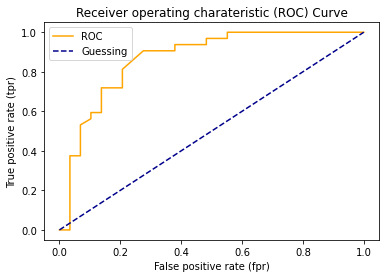

In [114]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curce given the false positive rate (fpr)
    and tru positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label ="Guessing")
    
    # customize the plt
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating charateristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [117]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

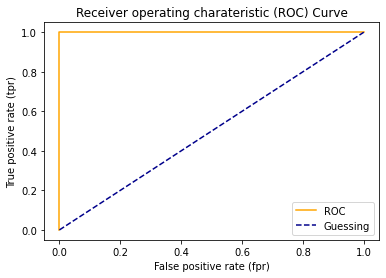

In [118]:
# Plot perfect rOC curve and AUC score
fpr, tpr, thresholds =roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [119]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion matrix

** Confusion matric

a confusion matric is a quick way to compare the labels a model predicts and the actual label
it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [121]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [123]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [124]:
23+6+6+26

61

In [125]:
len(y_preds)

61

### Creating a confusion matric using Scikit Learn
To use the new methods of creating a confusion matrix with Sckit-learn, you will need sklearn vesion 

In [133]:
import sklearn
sklearn.__version__

'1.1.1'

In [137]:
clf

RandomForestClassifier()

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, x_test, y_preds)

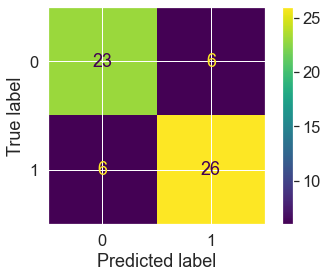

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)


### how to install a conda package into the current enviroment from jupyter notebook
import sys<br>
!conda install --yes --prefix {sys.prefix} seaborn

<AxesSubplot:>

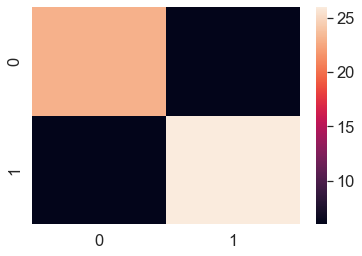

In [131]:
# make our confusion matrix more visual with Seaborn's heamap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

### Classification report

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [150]:
# where precision and recall become valuable
disease_true =np.zeros(10000)
disease_true[0]=1 # only 1 positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
